# Ausgeschalteter Zustand

Die Vorhersage ist stark abhängig vom Zustand des Ofens:

1. Wenn der Ofen Ausgeschaltet ist, muss lediglich der Zeitraum betrachtet werden, bis der Puffer leer ist
2. Wenn der Ofen im Automatik Zustand brennt, muss der Zeitraum betrachtet werden, bis er zu Ende gebrannt hat + die Zeit von 1.
3. Wenn der Ofen im Zustand Zündung bereit ist, muss der Zeitraum betrachtet werden, bis der Ofen zündet + die Zeit von 2.

Offensichtlich ist also die Vorhersage von 1. am einfachsten, da in diesem Fall die wenigsten Faktoren Einfluss haben. 
Deshalb wird im Abschnitt 3 zunächst nur dieser Fall betrachtet.

## Referenz vom Ofen

In Abschnitt 2 wurde bereits die Güte von der Vorhersage vom Ofen über alle Daten betrachtet. Da nun zunächst nur der ausgeschaltete Zustand betrachtet wird, muss erst die Güte der Ofenvorhersage dafür bestimmt. Dafür wird auch hier der MAPE verwendet.

In [1]:
from helper import *

df = load_merged_data(only_turned_off=True, drop_na=True)

In [2]:
y_actual = df['refuellingTimePointActual']
y_pred = df['refuellingTimePoint']

In [3]:
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error
import  numpy as np

mape = mean_absolute_percentage_error(y_actual, y_pred)
print(f'MAPE:  {mape:.2f}')

mse = mean_squared_error(y_actual, y_pred)
print(f'MSE:  {mse:.2f}')
print(f'RMSE:  {np.sqrt(mse):.2f}')

MAPE:  0.74
MSE:  93.24
RMSE:  9.66


Über alle Daten hinweg betrug der MAPE `0.69`. Das bedeutet, dass die Vorhersage des Ofens im ausgeschalteten Zustand sogar etwas schlechter ist als allgemein.

Um auch einen visuellen Eindruck von der Güte der Ofenvorhersage zu erhalten, kann man die Vorhersage gegen die tatsächliche Zeit auftragen. Dabei sollte die Vorhersage möglichst nah an der Diagonalen liegen. 
 

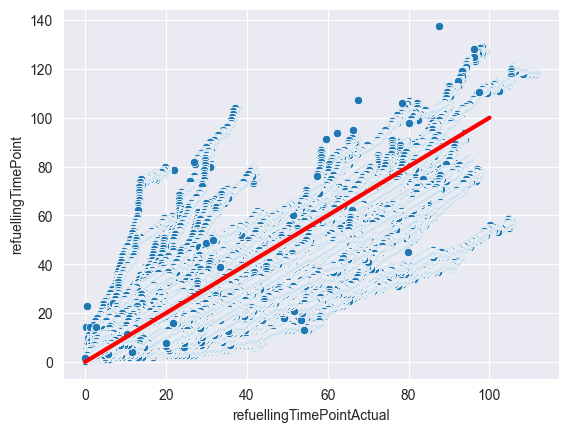

In [4]:
# plot the data
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

sns.scatterplot(x=y_actual, y=y_pred)
# add reference line with slope of 1
plt.plot([0, 100], [0, 100], color='red', lw=3)

In [5]:
# get smallest value for refuellingTimePointActual

min_val = y_actual.min()
print(f'Minimum: {min_val}')

Minimum: 0.0027777777777777775


In [6]:

# get all data where the refuelling is at least 10 minutes
df2 = df[df['refuellingTimePointActual'] >= 10/60]


y_actual = df2['refuellingTimePointActual']
y_pred = df2['refuellingTimePoint']

mape = mean_absolute_percentage_error(y_actual, y_pred)
print(f'MAPE:  {mape:.2f}')


MAPE:  0.44
